# Volcano plots
```
Andy Davidson
aedavids@ucsc.edu
12/04/22
```

used a juypter notebook to keep track of how all my volcano plots where created

ref:
- extraCellularRNA/terra/deseq/doc/plots/README.md


**TODO**
- 1vsAll LAML (Acute Myeloid Leukemia) AEDWIP missing ? not downloaded to mustard


In [1]:
from IPython.display import display
from IPython.display import Image
import pathlib as pl
import pandas as pd
import os
import sys

# hack to enable us to import local volcano plot module
module_path = os.path.abspath(os.path.join('../../deseq/python'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
    
# use newPP to run plots.volcanoPlots from cli
PYTHONPATH = os.environ["PYTHONPATH"]
newPP = "{}:../../deseq/python".format(PYTHONPATH)
    
#import plots.volcanoPlots as vp #we want to run from cli. 

/private/home/aedavids/extraCellularRNA/terra/deseq/python


In [2]:
# useful function for converting plot titles to strings
# https://stackoverflow.com/a/1007615/4586180
import re
def urlify(s):

    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)

    # Replace all runs of whitespace with a single dash
    s = re.sub(r"\s+", '-', s)

    return s

# Prints: I-cant-get-no-satisfaction"
#print(urlify("I can't get no satisfaction!"))

In [3]:
dataRoot = pl.Path('/private/groups/kimlab/GTEx_TCGA/1vsAll')

tmpDir = pl.Path('/scratch/aedavids/tmp')
tmpDir.mkdir(exist_ok=True)

imgOutDir = pl.Path("img/volcanoPlots")
imgOutDir.mkdir(parents=True, exist_ok=True)

# first col is te names ucsc.rmsk.insert.info.txt 
refRootDir = pl.Path('/private/groups/kimlab/genomes.annotations/genomes.annotations/gencode.39')
# '/ucsc.rmsk.insert.info.txt'
teInfoFilePath = refRootDir.joinpath('named_ucsc.rmsk.insert.info.txt')
headerCols = []
teNameDF = pd.read_csv(teInfoFilePath, sep="\t")
teNameDF.head()

# create a file with a list of the te names
teGeneNamesPath = tmpDir.joinpath('ucsc.rmsk.te.gene.names.txt')
teNameDF.loc[:, "insert"].to_csv(teGeneNamesPath, index=False)

# kras lung, colorectal, pancreatic

# GTEx
# Kidney_Cortex_vs_all.results
# Whole_Blood_vs_all.results
# Lung_vs_all.results
# Colon_Sigmoid_vs_all.results 
# Colon_Transverse_vs_all.result
# Pancreas_vs_all.results

#TCGA
# KIRC_vs_all.results ( Kidney renal clear cell carcinoma)
# KIRP_vs_all.results (Kidney renal papillary cell carcinoma)
# KICH_vs_all.results (Kidney Chromophobe)

# LUAD_vs_all.results (Lung adenocarcinoma)
# LUSC_vs_all.results (Lung squamous cell carcinoma)

# PAAD_vs_all.results (Pancreatic adenocarcinoma)

# COAD_vs_all.results (Colon adenocarcinoma)
# READ_vs_all.results (Rectum adenocarcinoma)

# PRAD_vs_all.results (Prostate adenocarcinoma)

# LAML (Acute Myeloid Leukemia) AEDWIP missing ? not downloaded to mustard
# DLBC_vs_all.results (Lymphoid Neoplasm Diffuse Large B-cell Lymphoma) (white blood cells)

In [4]:
# create a small test file
sampleFileName = "Kidney_Cortex_vs_all.results"
sampleFilePath = dataRoot.joinpath( sampleFileName )

testFileName = 'test1vsAll.results'
testFilePath = tmpDir.joinpath(testFileName)

! head -n 100 $sampleFilePath  > $testFilePath


# add a couple TE
#"name","baseMean","log2FoldChange","lfcSE","stat","pvalue","padj"
# "AC099811.3",0.511922973692522,3.69941539007455,0.0909139179668034,40.6914086732613,0,0
# "AC234917.1",1.00824497308773,3.29968487620775,0.0677938637465999,48.6723236271253,0,0
dataFmt = "{},0.511922973692522,{},3.69941539007455,0.0909139179668034,0.090,{}"

def insertTestData(teNameDF, idx, logFoldChange, padj):
    teName = teNameDF.loc[idx,"insert"]
    print("teName: {}".format(teName.strip()))
    te1 = dataFmt.format( teName, logFoldChange, padj) 
    ! echo $te1 >> $testFilePath
    
# up and signfigant
insertTestData(teNameDF, idx=1, logFoldChange=4.0, padj=0.002e-86)
insertTestData(teNameDF, idx=2, logFoldChange=5.0, padj=0.002e-80)


# down and signifgant
insertTestData(teNameDF, idx=3, logFoldChange=-8.0, padj=0.002e-86)
insertTestData(teNameDF, idx=4, logFoldChange=-7.4, padj=0.002e-80)

# other


! tail -n 10 $testFilePath

teName: TAR1
teName: L1MC5a
teName: MER5B
teName: MIR3
"SLC22A8",40.7550757805551,11.3382322097518,0.681566496926647,16.6355480512595,3.85215091023416e-62,1.57685805018585e-59
"PRRX1",2655.54444263229,-4.01448663758273,0.241884691138576,-16.5966958003259,7.3634383962095e-62,2.97993331368419e-59
"RIMS4",652.007139358706,-6.4619342281219,0.389670232405442,-16.5830840817177,9.23645853438198e-62,3.69593255938141e-59
"TBX5",311.616813779589,-7.78350171931403,0.470076857716339,-16.5579342857394,1.40329810391336e-61,5.55285059718518e-59
"NFIX",6355.74163248758,-2.70728076651658,0.163643363055534,-16.5437859254814,1.77507290808567e-61,6.94677708523682e-59
"MAST1",668.196588394251,-6.12340287927644,0.370291989547587,-16.5366874037914,1.99706541610518e-61,7.73059681127759e-59
TAR1,0.511922973692522,4.0,3.69941539007455,0.0909139179668034,0.090,2e-89
L1MC5a,0.511922973692522,5.0,3.69941539007455,0.0909139179668034,0.090,2e-83
MER5B,0.511922973692522,-8.0,3.69941539007455,0.0909139179668034,0.090,

In [5]:
# ! (export PYTHONPATH=$newPP; python -m plots.volcanoPlots -h)

DEBUG cli.args.geneNamesFile:/scratch/aedavids/tmp/ucsc.rmsk.te.gene.names.txt
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.


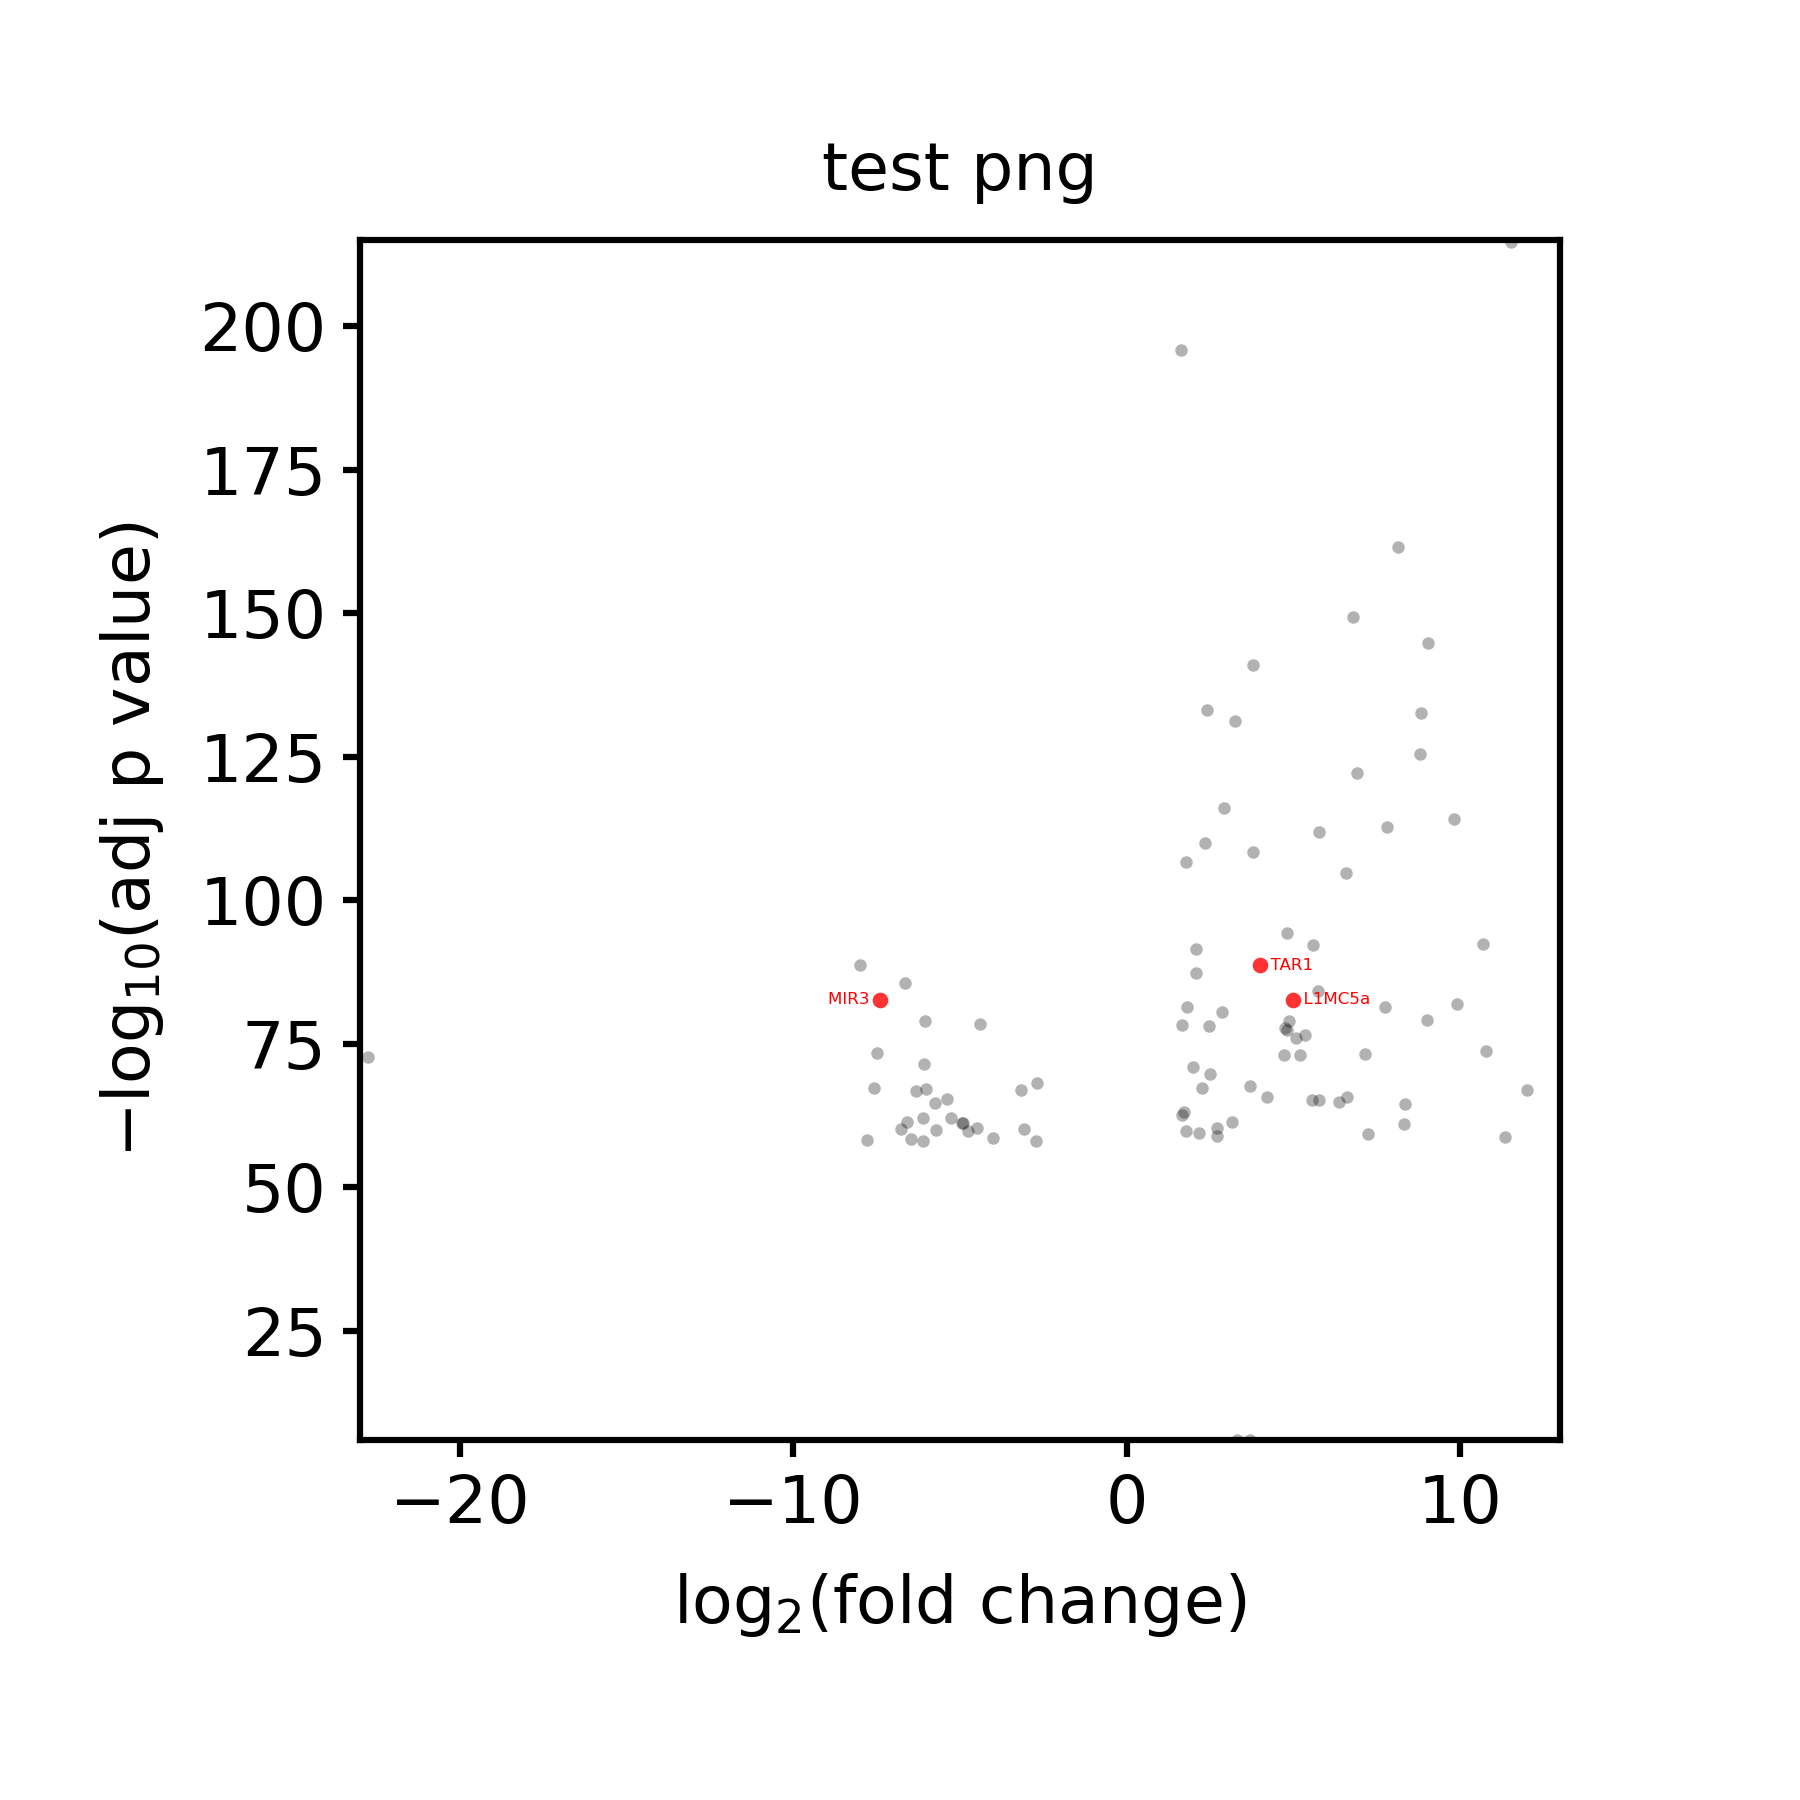

In [6]:
imgFilePath = str(testFilePath) + ".png"
arguments = "--inputFile {} \
                --title 'test png' \
                --output {}  \
                --numHeaderLines {}\
                --geneNamesFile {}".format(testFilePath , imgFilePath, 8, teGeneNamesPath)
! (export PYTHONPATH=$newPP; python -m plots.volcanoPlots $arguments)

Image(imgFilePath)

arguments:
--inputFile /private/groups/kimlab/GTEx_TCGA/1vsAll/Kidney_Cortex_vs_all.results \
                    --title 'Kidney_Cortex_vs_all.results 1vsAll' \
                    --output img/volcanoPlots/Kidney_Cortex_vs_allresults-1vsAll.png  \
                    --numHeaderLines 8 \
                    --geneNamesFile /scratch/aedavids/tmp/ucsc.rmsk.te.gene.names.txt
exit status:["findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.", 'DEBUG cli.args.geneNamesFile:/scratch/aedavids/tmp/ucsc.rmsk.te.gene.names.txt']
CPU times: user 4.3 ms, sys: 10.1 ms, total: 14.4 ms
Wall time: 49.5

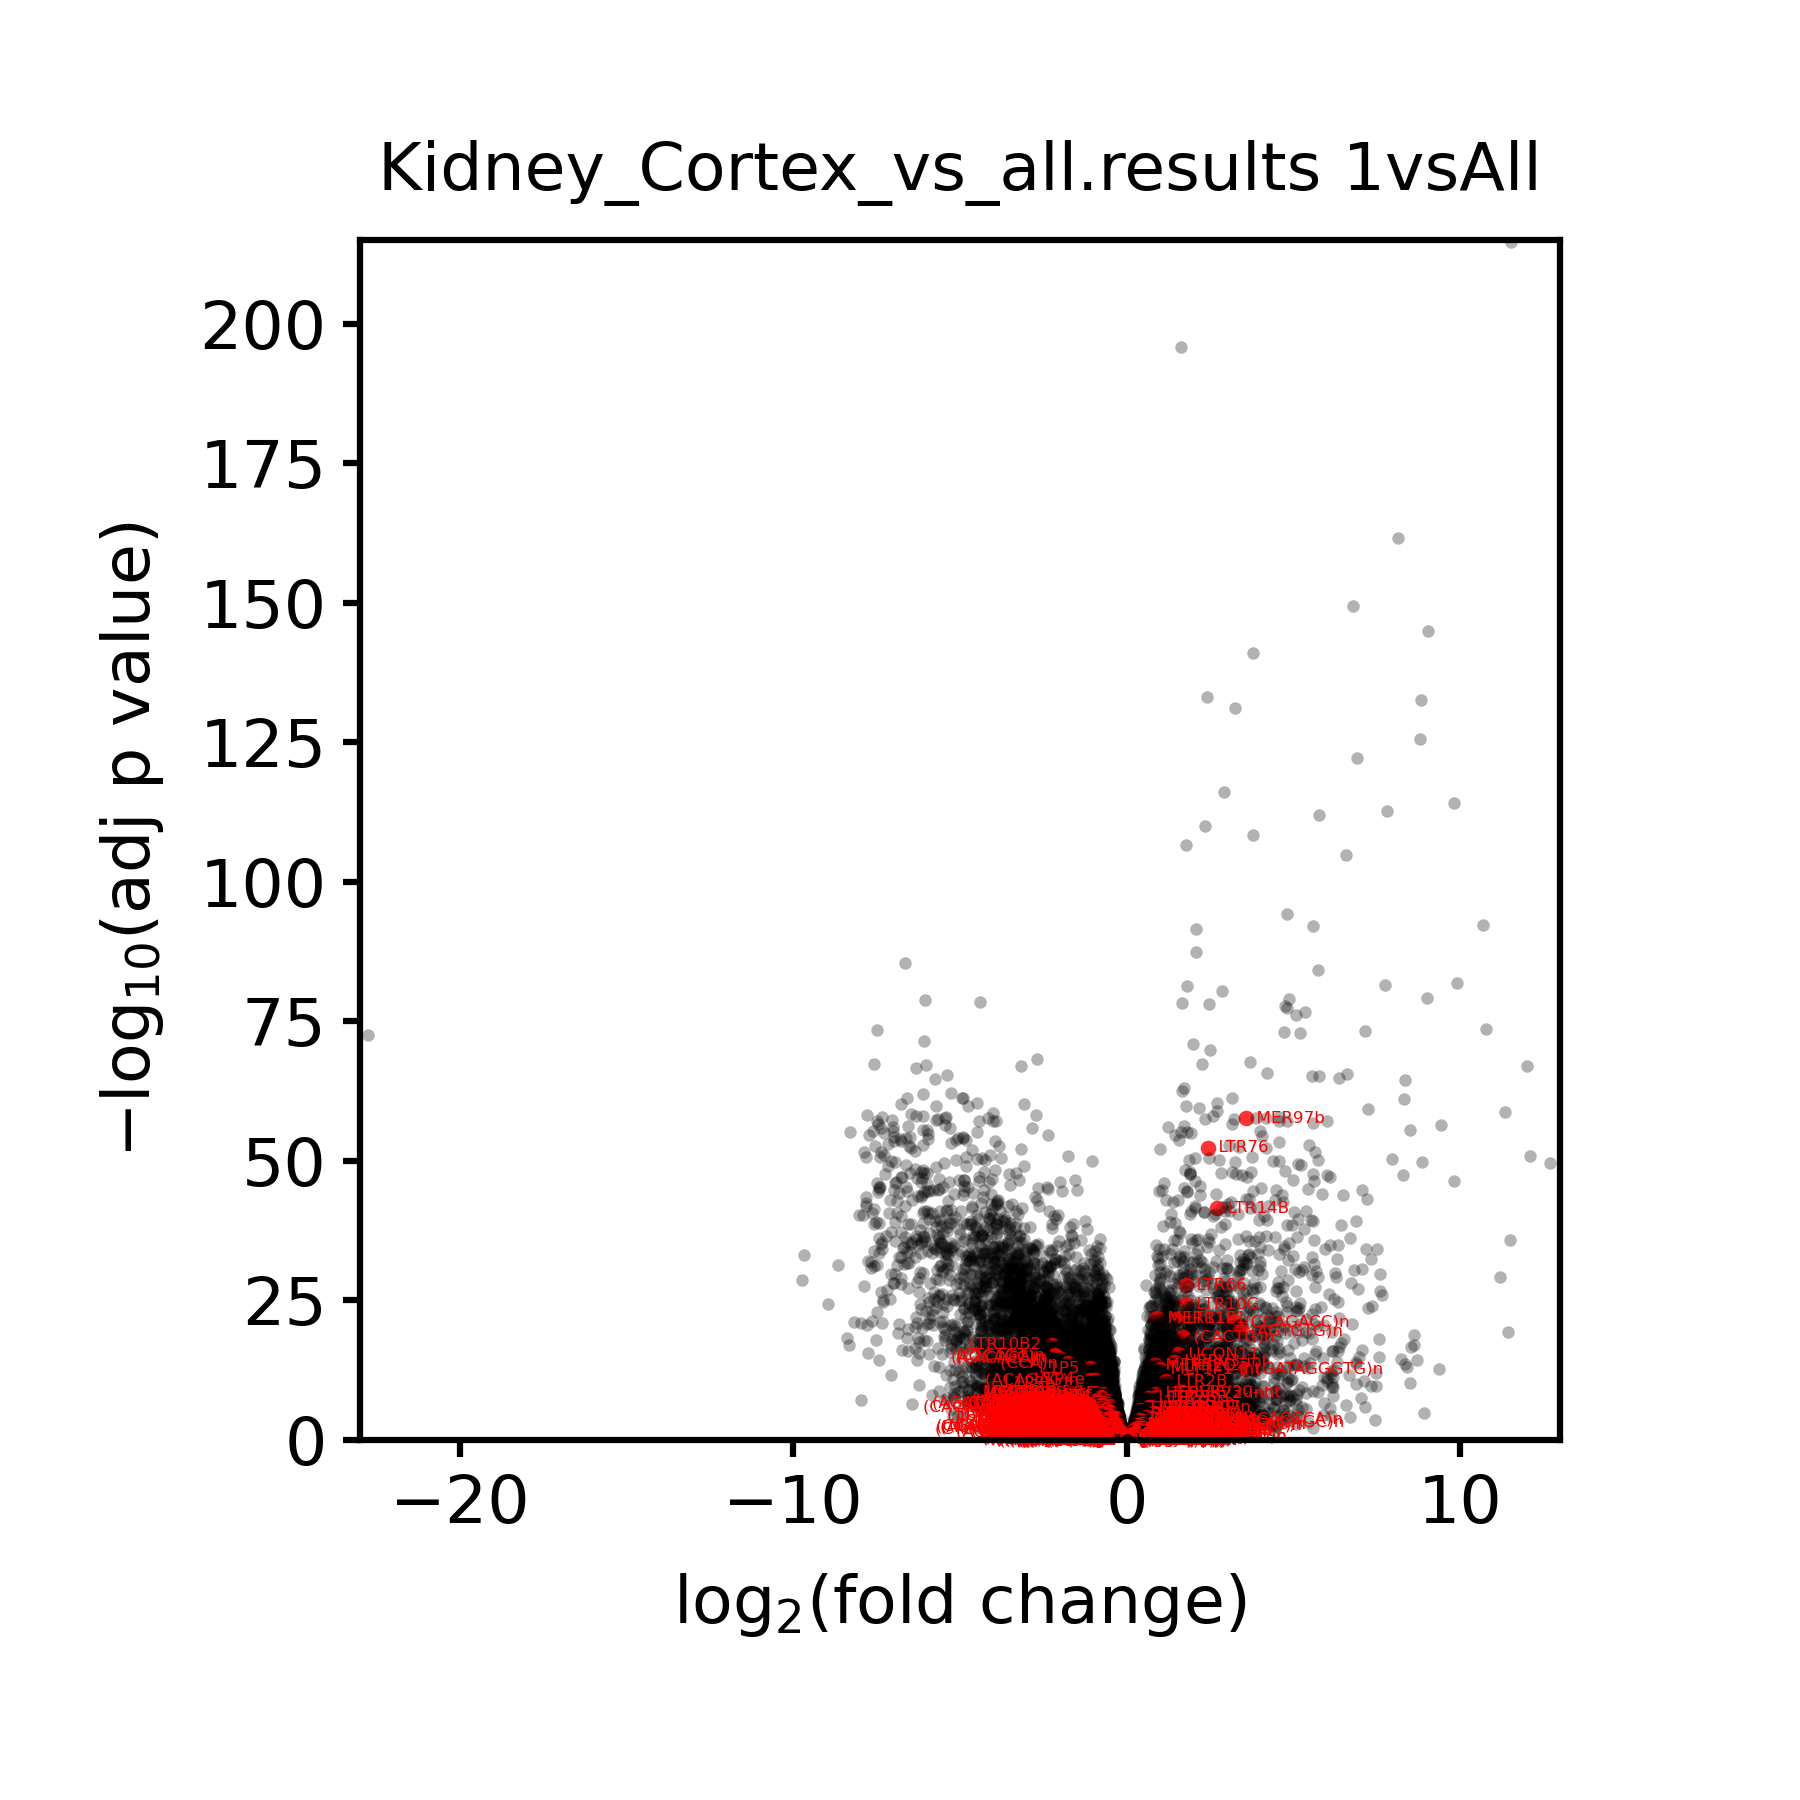

In [7]:
%%time

def createVolcanoPlot(pythonPath, deseqResults, imgFilePath, numHeaderLines, plotTitle=None, teGeneNamesPath=None):
    '''
    arguments:
        pythonPath:
            set PYTHONPATH to this value. required to find volcano plot code
        deseqResults:
            example: /private/groups/kimlab/GTEx_TCGA/1vsAll/Kidney_Cortex_vs_all.results
            
        imgFilePath: 
            file path to save image with
            
        numHeaderLines
            integer: number of lines at the top of the results file to skip
            
        plotTitle:
            string: plot title string
            
        teGeneNamesPath
            file that contains genes we want to color red
            
    returns exit status
    '''
    
    arguments ='''--inputFile {} \\
                    --title '{}' \\
                    --output {}  \\
                    --numHeaderLines {} \\
                    --geneNamesFile {}'''.format(deseqResults, 
                                               plotTitle, 
                                               imgFilePath, 
                                               numHeaderLines, 
                                               teGeneNamesPath)
    print("arguments:\n{}".format(arguments))
    
    exitStatus = ! (export PYTHONPATH=$pythonPath; python -m plots.volcanoPlots $arguments)
    print("exit status:{}".format(exitStatus))
    return exitStatus


# set arguments 
sampleFileName = "Kidney_Cortex_vs_all.results"
sampleFilePath = dataRoot.joinpath( sampleFileName )
                                   
# imgFilePath = str(testFilePath) + ".png"
plotTitle = "{} 1vsAll".format(sampleFileName)
imgFilePath = imgOutDir.joinpath( urlify(plotTitle) + ".png" )

numHeaderLines = 8
                
# plot
exitStatus = createVolcanoPlot(newPP, 
                               sampleFilePath, 
                               imgFilePath, 
                               numHeaderLines, 
                               plotTitle, 
                               teGeneNamesPath)
      
# display
Image(imgFilePath)    

arguments:
--inputFile /private/groups/kimlab/GTEx_TCGA/1vsAll/KIRC_vs_all.results \
                    --title 'Kidney renal clear cell carcinoma 1vsAll' \
                    --output img/volcanoPlots/Kidney-renal-clear-cell-carcinoma-1vsAll.png  \
                    --numHeaderLines 8 \
                    --geneNamesFile /scratch/aedavids/tmp/ucsc.rmsk.te.gene.names.txt
exit status:["findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.", 'DEBUG cli.args.geneNamesFile:/scratch/aedavids/tmp/ucsc.rmsk.te.gene.names.txt']


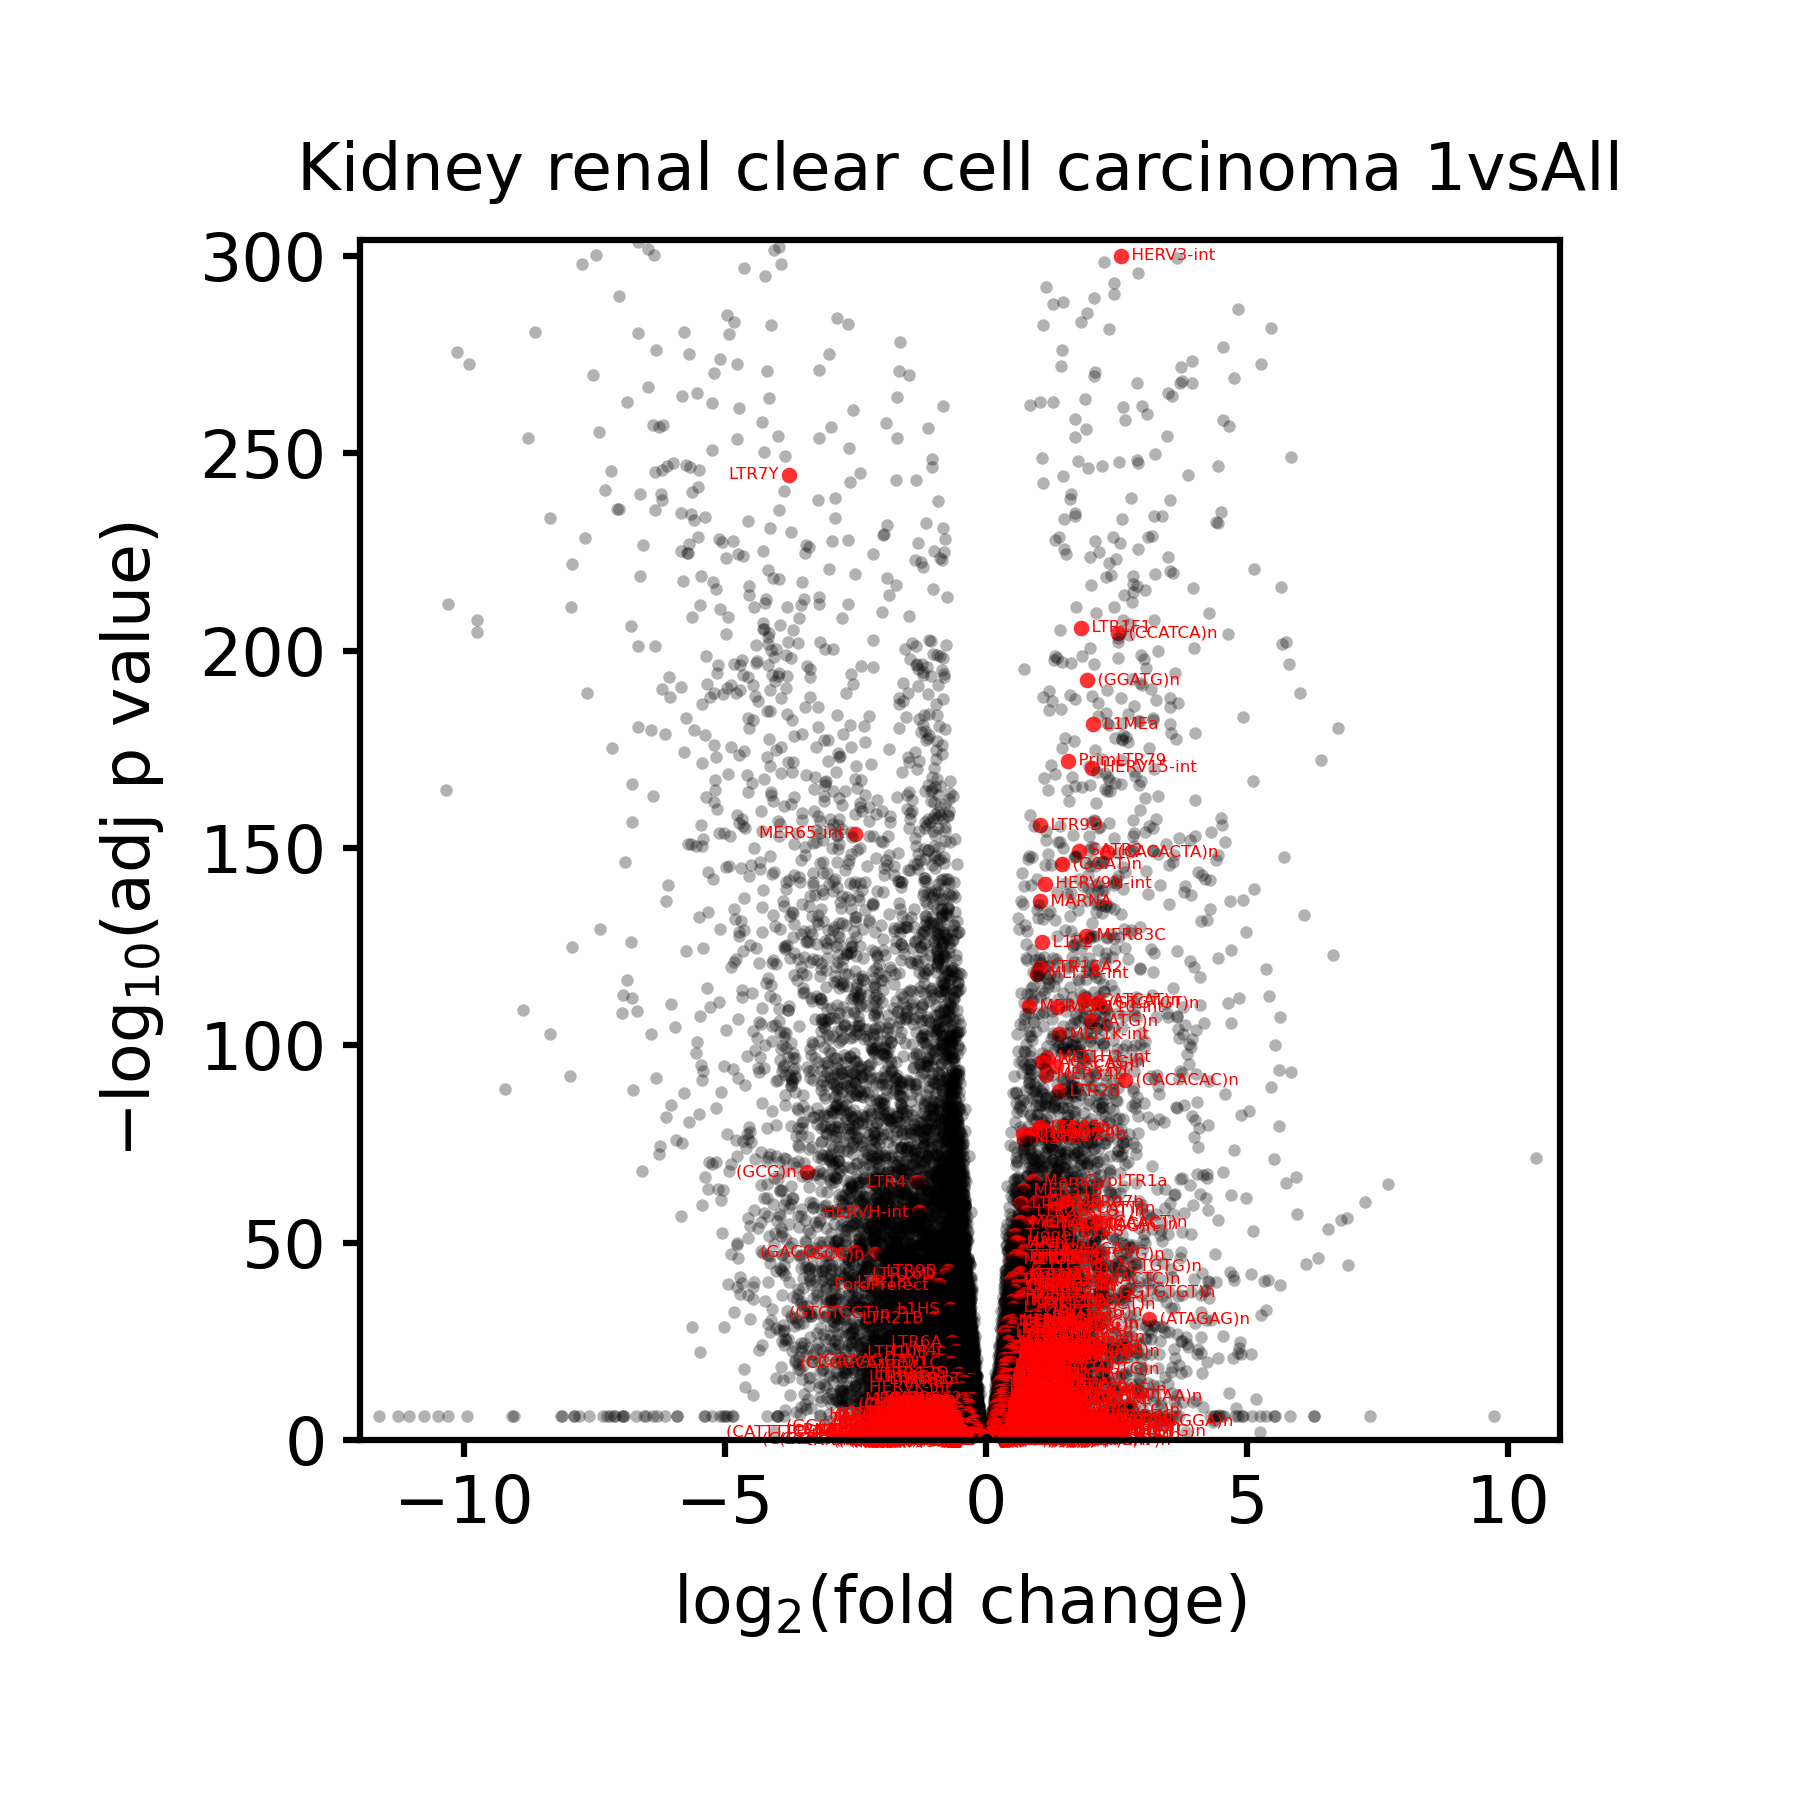

In [8]:
# plot
# KIRC_vs_all.results ( Kidney renal clear cell carcinoma)

sampleFileName = "KIRC_vs_all.results"
sampleFilePath = dataRoot.joinpath( sampleFileName )

plotTitle = "Kidney renal clear cell carcinoma 1vsAll".format(sampleFileName)
imgFilePath = imgOutDir.joinpath( urlify(plotTitle) + ".png" )

exitStatus = createVolcanoPlot(newPP, 
                               sampleFilePath, 
                               imgFilePath, 
                               numHeaderLines, 
                               plotTitle, 
                               teGeneNamesPath)
      
# display
Image(imgFilePath)    

arguments:
--inputFile /private/groups/kimlab/GTEx_TCGA/1vsAll/KIRP_vs_all.results \
                    --title 'Kidney renal papillary cell carcinoma 1vsAll' \
                    --output img/volcanoPlots/Kidney-renal-papillary-cell-carcinoma-1vsAll.png  \
                    --numHeaderLines 8 \
                    --geneNamesFile /scratch/aedavids/tmp/ucsc.rmsk.te.gene.names.txt
exit status:["findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.", 'DEBUG cli.args.geneNamesFile:/scratch/aedavids/tmp/ucsc.rmsk.te.gene.names.txt']


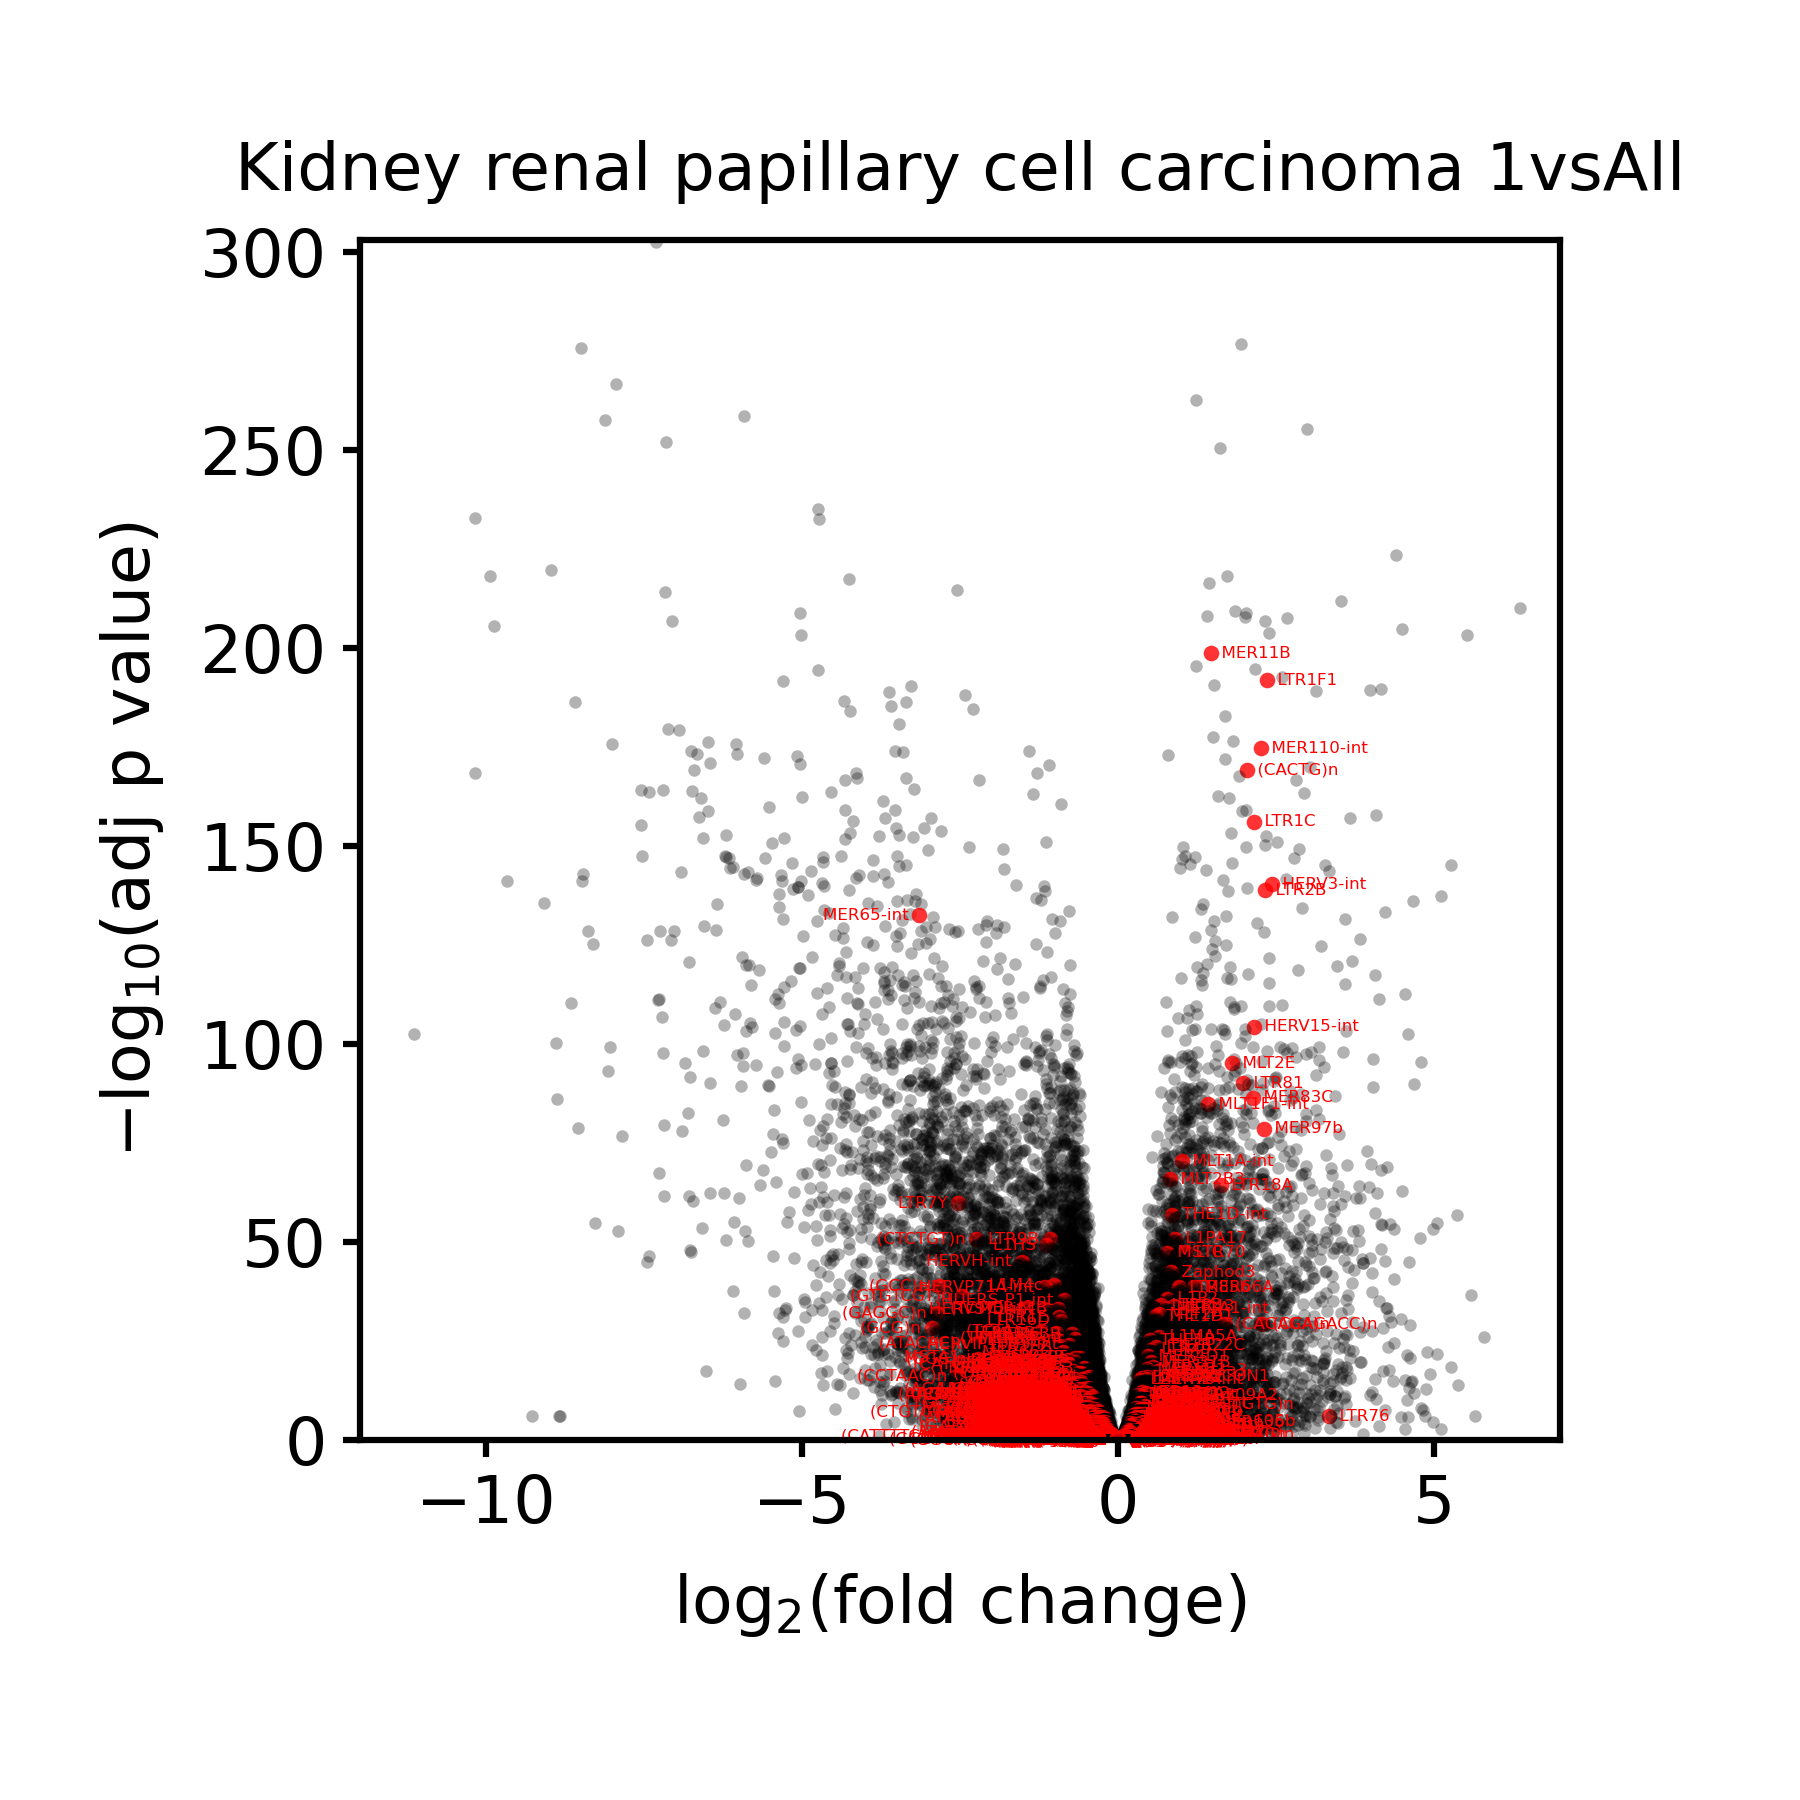

In [9]:
# KIRP_vs_all.results (Kidney renal papillary cell carcinoma)
sampleFileName = "KIRP_vs_all.results"
sampleFilePath = dataRoot.joinpath( sampleFileName )

plotTitle = "Kidney renal papillary cell carcinoma 1vsAll".format(sampleFileName)
imgFilePath = imgOutDir.joinpath( urlify(plotTitle) + ".png" )

exitStatus = createVolcanoPlot(newPP, 
                               sampleFilePath, 
                               imgFilePath, 
                               numHeaderLines, 
                               plotTitle, 
                               teGeneNamesPath)
      
# display
Image(imgFilePath)   

arguments:
--inputFile /private/groups/kimlab/GTEx_TCGA/1vsAll/KICH_vs_all.results \
                    --title 'Kidney Chromophobe 1vsAll' \
                    --output img/volcanoPlots/Kidney-Chromophobe-1vsAll.png  \
                    --numHeaderLines 8 \
                    --geneNamesFile /scratch/aedavids/tmp/ucsc.rmsk.te.gene.names.txt
exit status:["findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.", 'DEBUG cli.args.geneNamesFile:/scratch/aedavids/tmp/ucsc.rmsk.te.gene.names.txt']


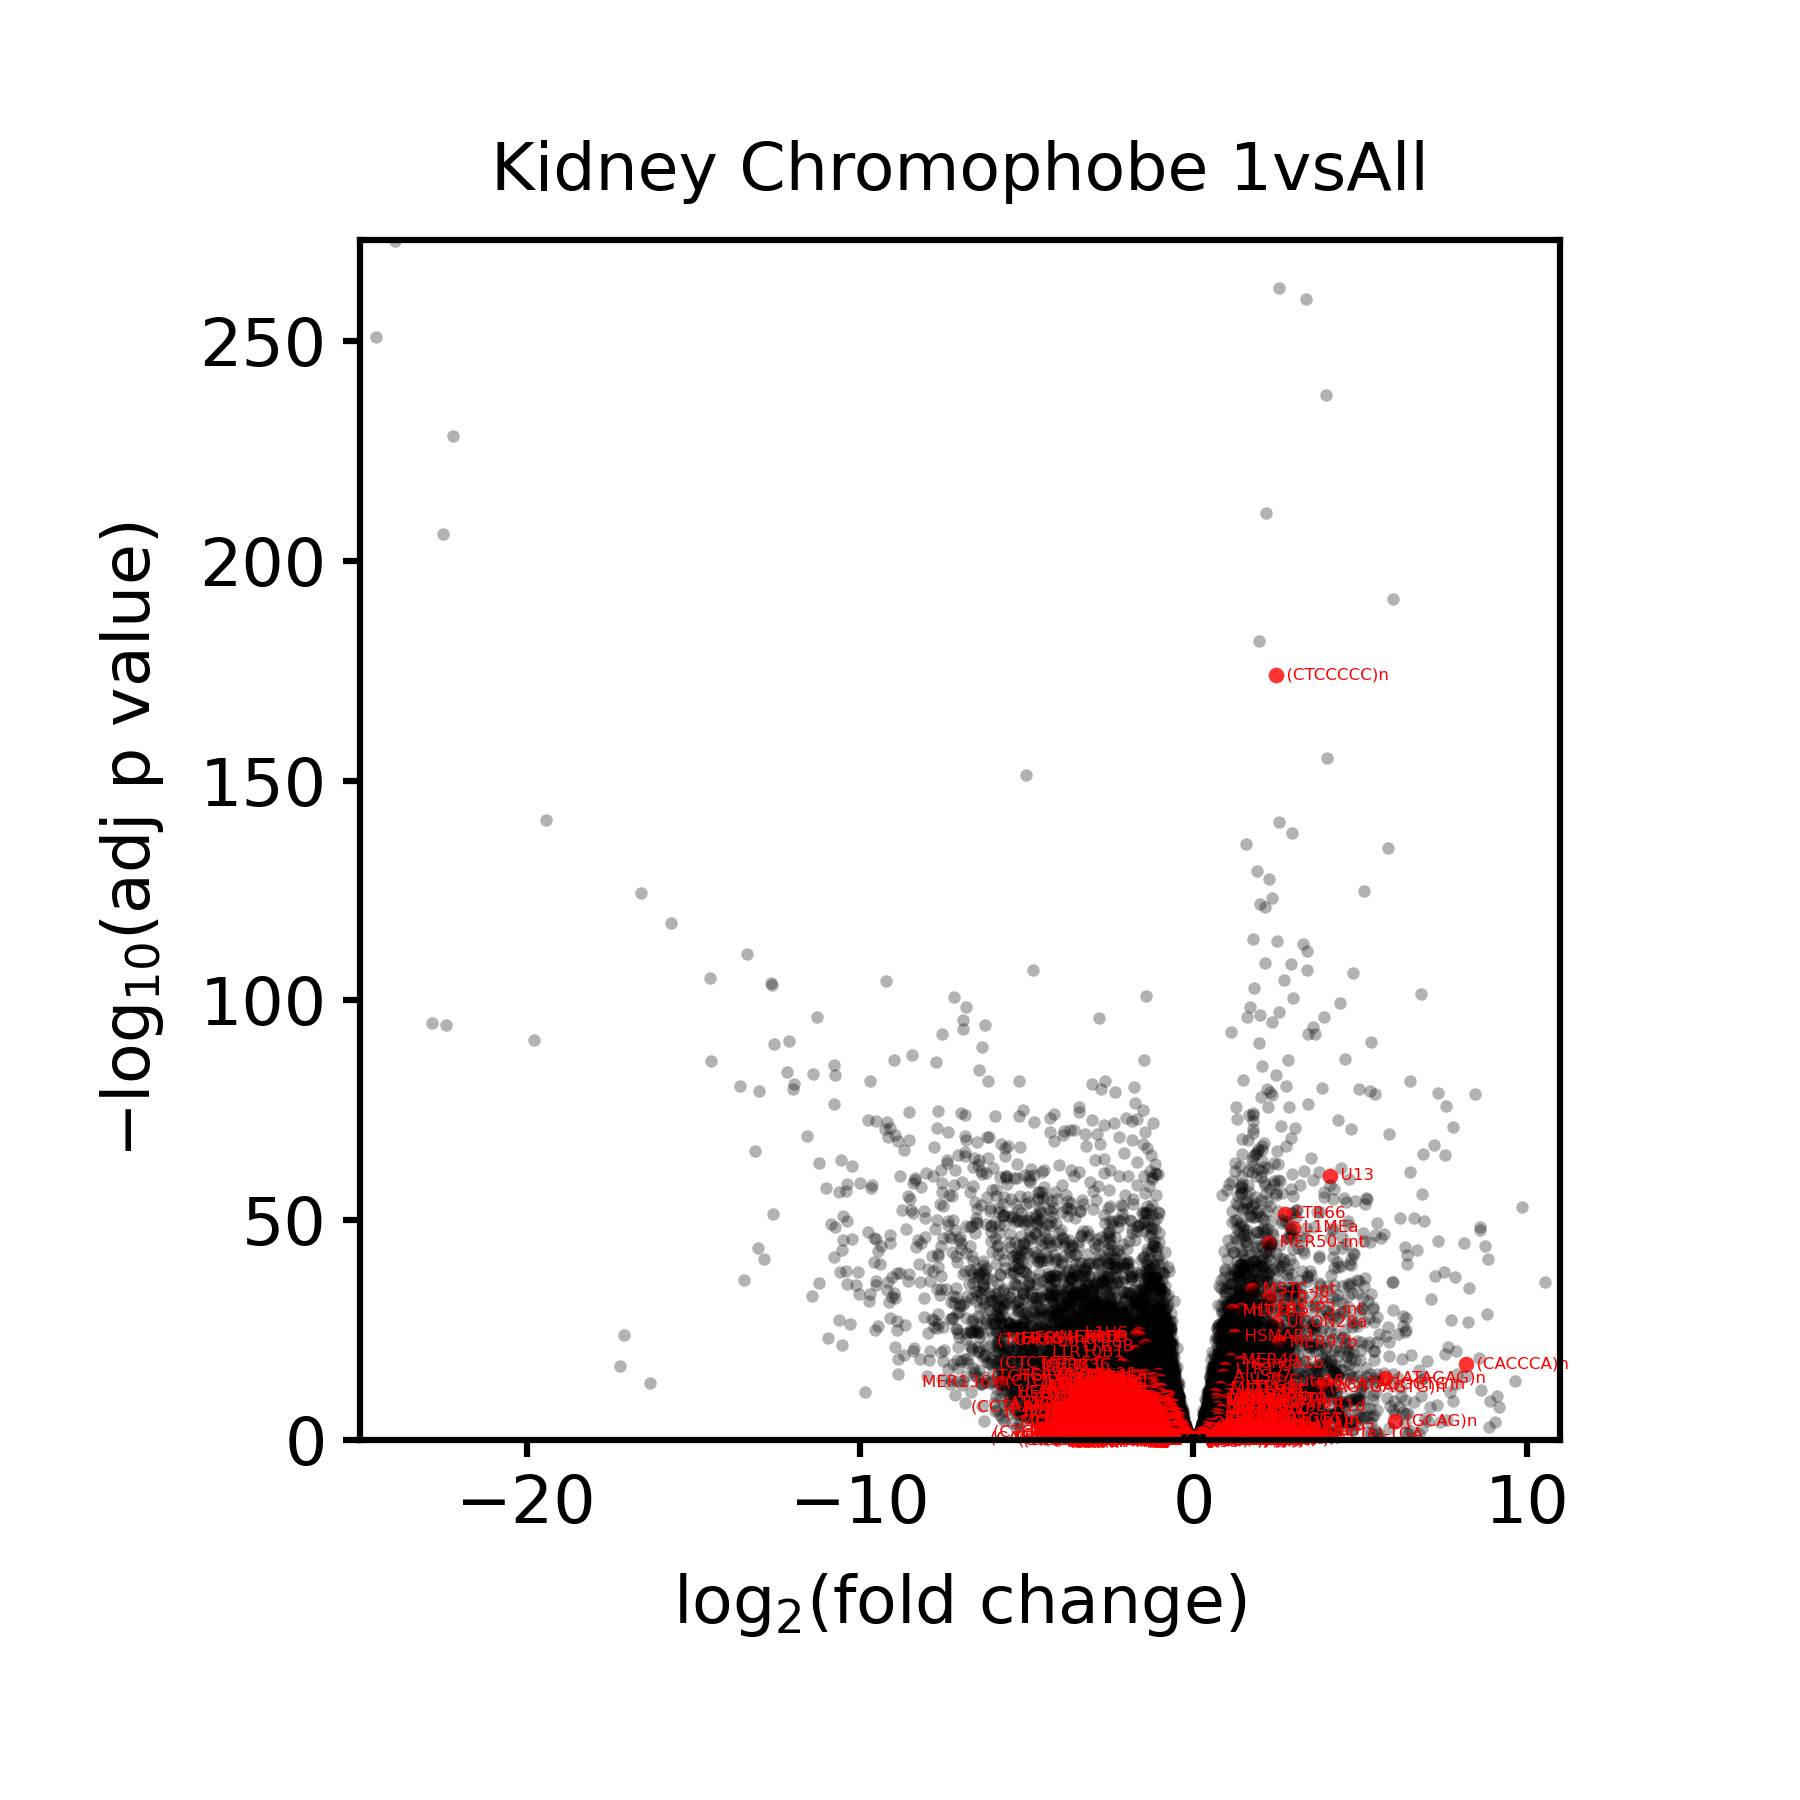

In [10]:
# KICH_vs_all.results (Kidney Chromophobe)
sampleFileName = "KICH_vs_all.results"
sampleFilePath = dataRoot.joinpath( sampleFileName )

plotTitle = "Kidney Chromophobe 1vsAll".format(sampleFileName)
imgFilePath = imgOutDir.joinpath( urlify(plotTitle) + ".png" )

exitStatus = createVolcanoPlot(newPP, 
                               sampleFilePath, 
                               imgFilePath, 
                               numHeaderLines, 
                               plotTitle, 
                               teGeneNamesPath)
      
# display
Image(imgFilePath)   

arguments:
--inputFile /private/groups/kimlab/GTEx_TCGA/1vsAll/Whole_Blood_vs_all.results \
                    --title 'Whole_Blood_vs_all.results 1vsAll' \
                    --output img/volcanoPlots/Whole_Blood_vs_allresults-1vsAll.png  \
                    --numHeaderLines 8 \
                    --geneNamesFile /scratch/aedavids/tmp/ucsc.rmsk.te.gene.names.txt
exit status:["findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.", 'DEBUG cli.args.geneNamesFile:/scratch/aedavids/tmp/ucsc.rmsk.te.gene.names.txt']
CPU times: user 6.02 ms, sys: 12.1 ms, total: 18.1 ms
Wall time: 1min 12s


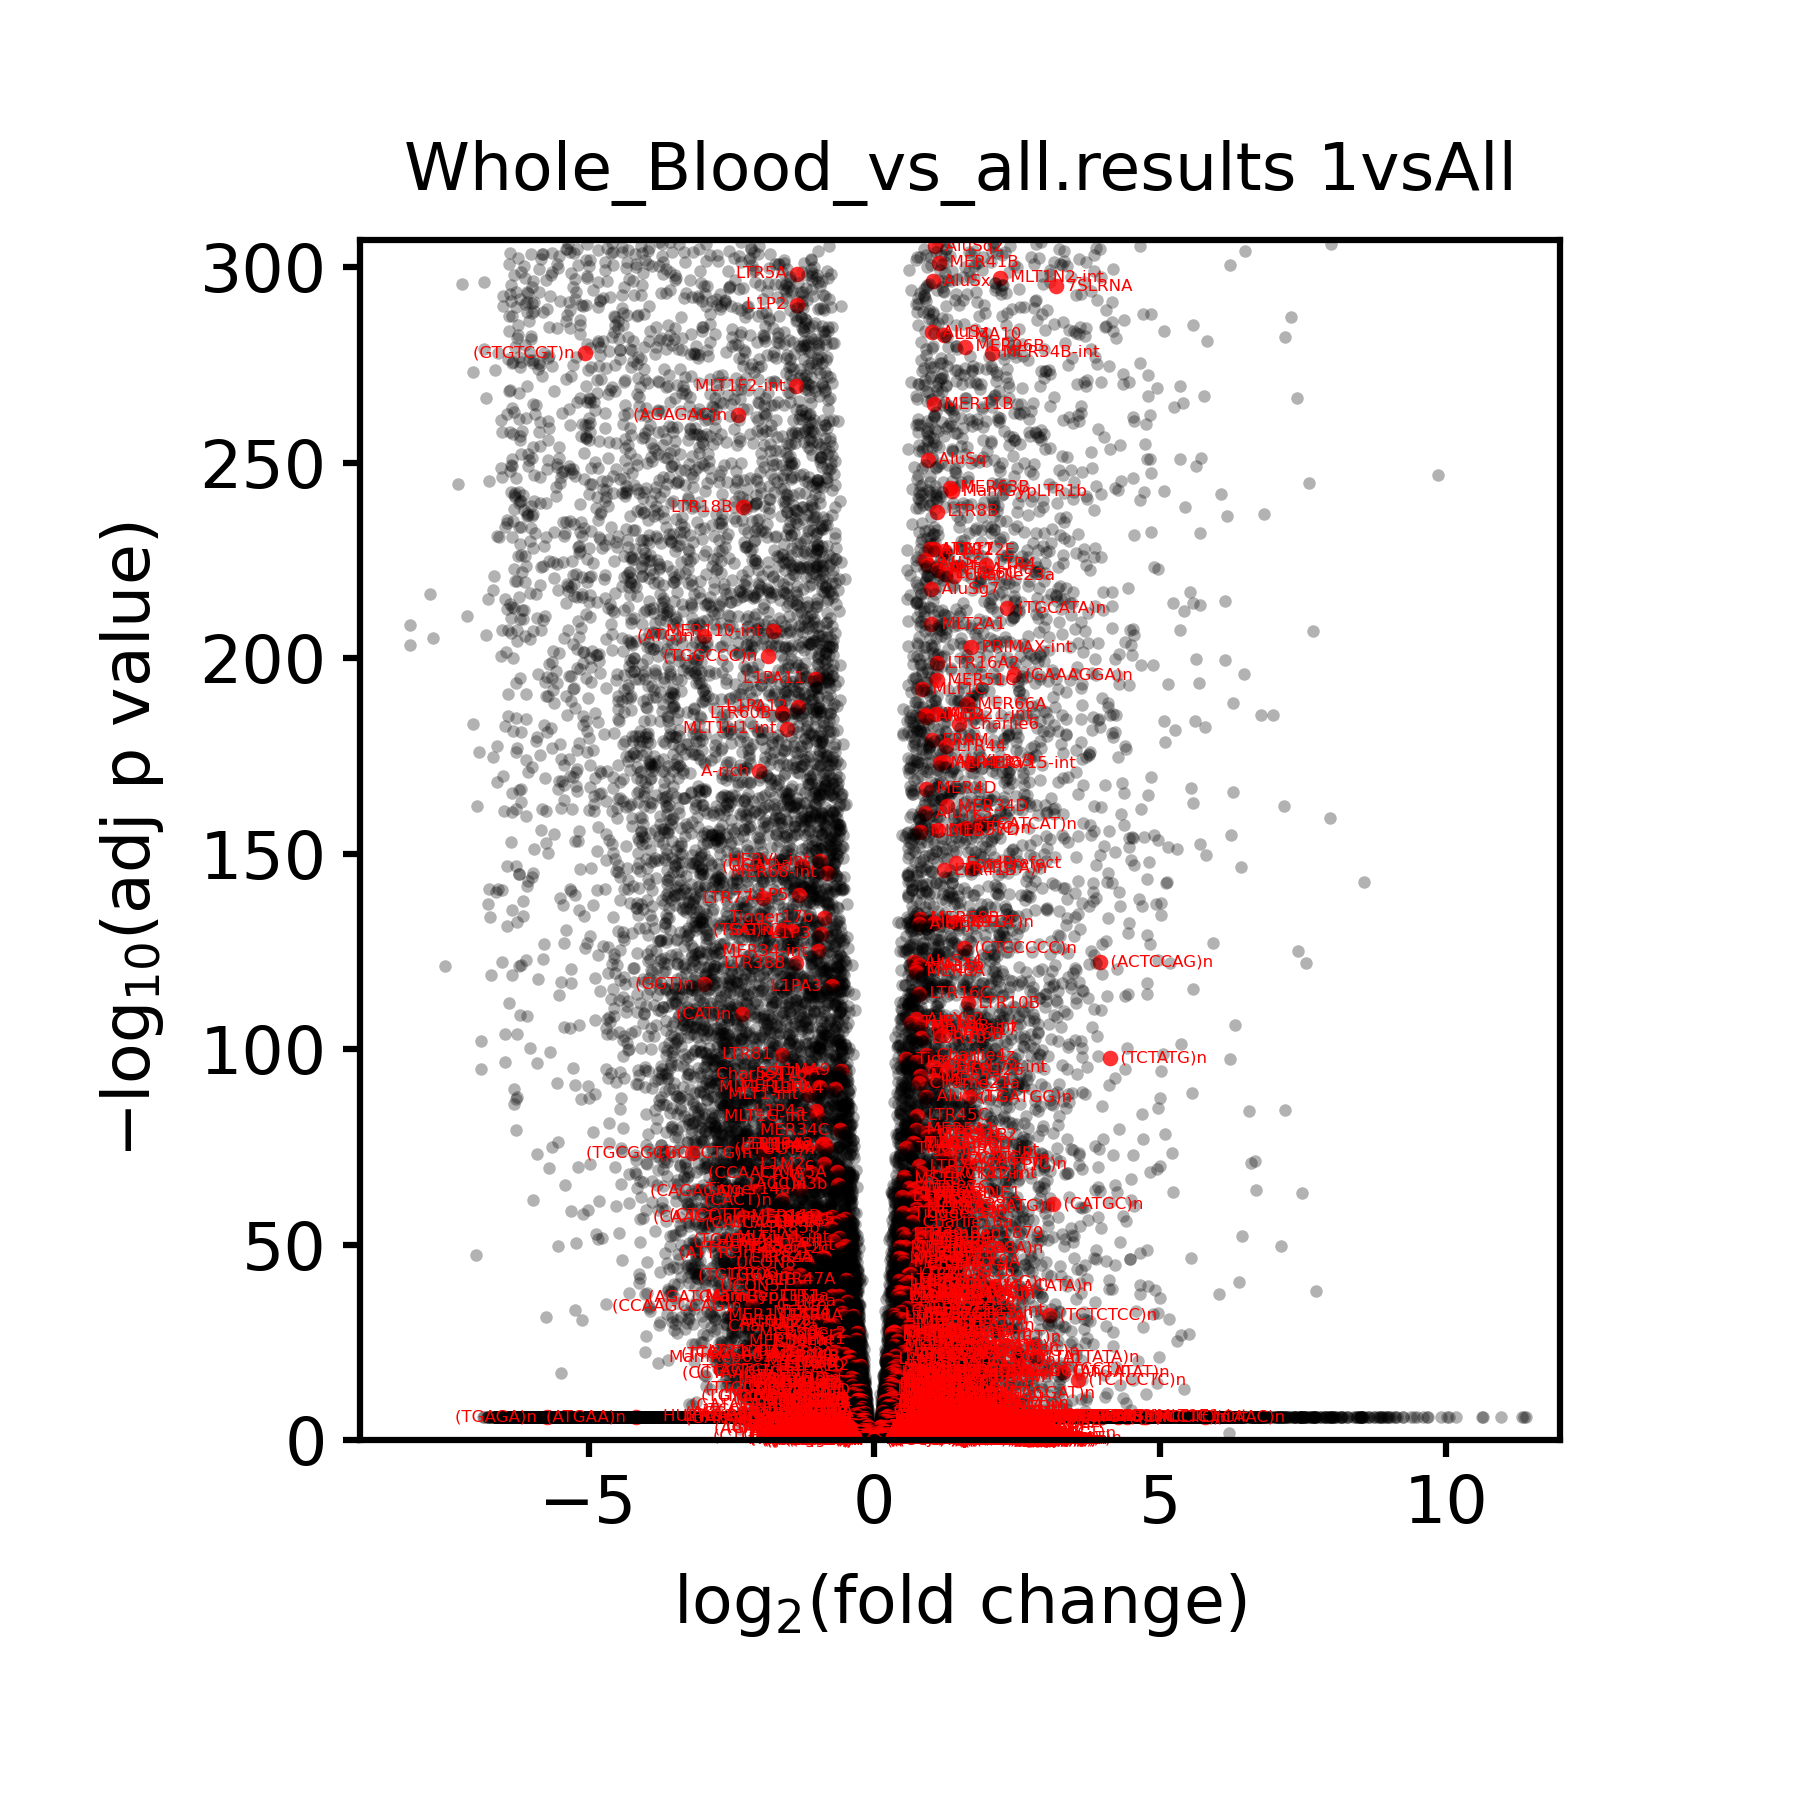

In [11]:
%%time
# GTEx 
sampleFileName = "Whole_Blood_vs_all.results"
sampleFilePath = dataRoot.joinpath( sampleFileName )

plotTitle = "Whole_Blood_vs_all.results 1vsAll".format(sampleFileName)
imgFilePath = imgOutDir.joinpath( urlify(plotTitle) + ".png" )

exitStatus = createVolcanoPlot(newPP, 
                               sampleFilePath, 
                               imgFilePath, 
                               numHeaderLines, 
                               plotTitle, 
                               teGeneNamesPath)
      
# display
Image(imgFilePath)   

arguments:
--inputFile /private/groups/kimlab/GTEx_TCGA/1vsAll/Whole_Blood_vs_all.results \
                    --title 'DLBC-Lymphoid Neoplasm Diffuse Large B-cell Lymphoma 1vsAll' \
                    --output img/volcanoPlots/DLBCLymphoid-Neoplasm-Diffuse-Large-Bcell-Lymphoma-1vsAll.png  \
                    --numHeaderLines 8 \
                    --geneNamesFile /scratch/aedavids/tmp/ucsc.rmsk.te.gene.names.txt
exit status:["findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.", "findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.", 'DEBUG cli.args.geneNamesFile:/scratch/aedavids/tmp/ucsc.rmsk.te.gene.names.txt']
CPU times: user 5.55 ms

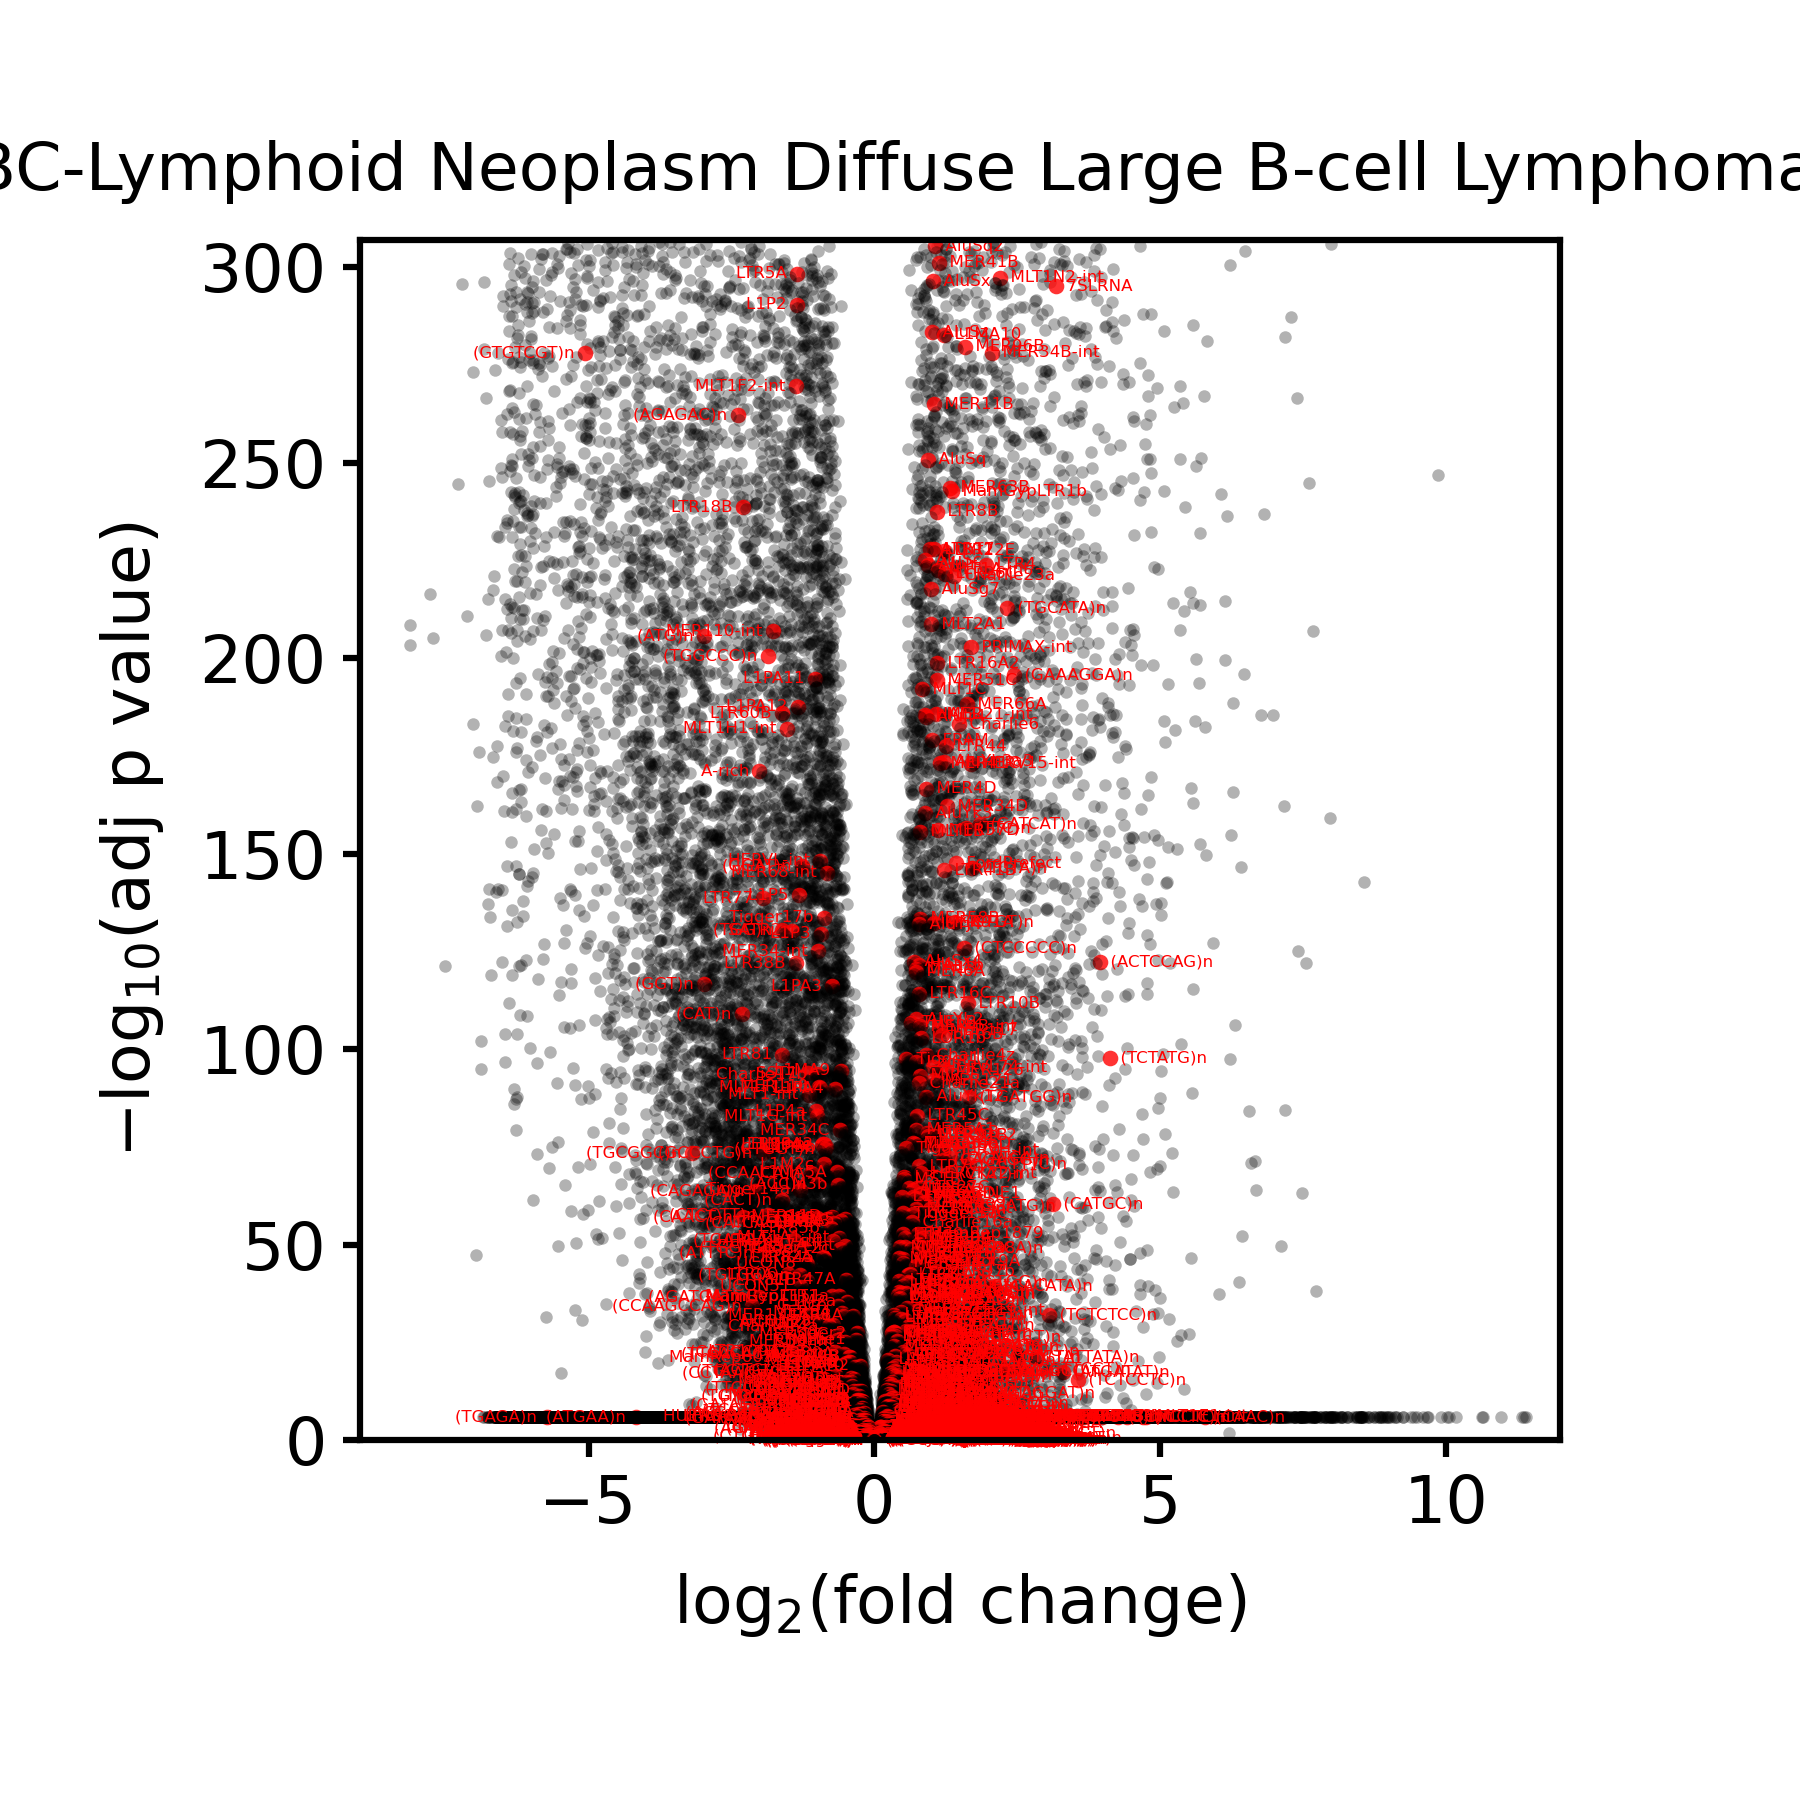

In [12]:
%%time
# DLBC_vs_all.results (Lymphoid Neoplasm Diffuse Large B-cell Lymphoma) (white blood cells)
ampleFileName = "DLBC_vs_all.results"
sampleFilePath = dataRoot.joinpath( sampleFileName )

plotTitle = "DLBC-Lymphoid Neoplasm Diffuse Large B-cell Lymphoma 1vsAll".format(sampleFileName)
imgFilePath = imgOutDir.joinpath( urlify(plotTitle) + ".png" )

exitStatus = createVolcanoPlot(newPP, 
                               sampleFilePath, 
                               imgFilePath, 
                               numHeaderLines, 
                               plotTitle, 
                               teGeneNamesPath)
      
# display
Image(imgFilePath)   